# 1.3.2 Arithmetic Operations on Images

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.uint8([250])

In [3]:
print(x)

[250]


In [4]:
y = np.uint8([10])

In [5]:
print(y)

[10]


In [6]:
x+y

array([4], dtype=uint8)

In [7]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [84]:
w=0.5
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
dst = cv2.addWeighted(img1,w,img2,1-w,0)

In [85]:
def nothing(x):
    pass

In [86]:
cv2.namedWindow('image')

cv2.createTrackbar('weight','image',0,255,nothing)

while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
    weight = cv2.getTrackbarPos('weight', 'image')
    dst = cv2.addWeighted(img1,weight/255,img2,1-weight/255,0)
    cv2.imshow('image', dst)

cv2.destroyAllWindows()

In [114]:
img1 = cv2.imread('1.png')
img2 = cv2.imread('cv2.png')

def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [115]:
rows,cols,channels = img2.shape
print(rows,cols,channels)

377 392 3


In [116]:
roi = img1[0:rows, 0:cols]

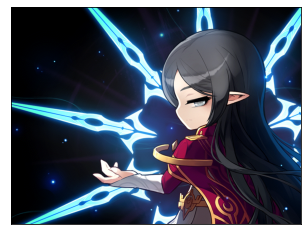

In [117]:
pltImage(img1)

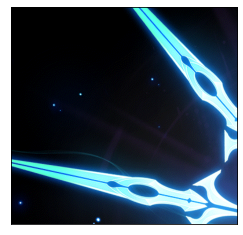

In [118]:
pltImage(roi)

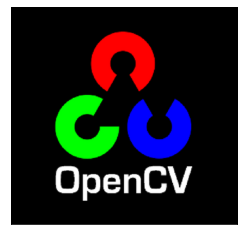

In [119]:
pltImage(img2)

In [120]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

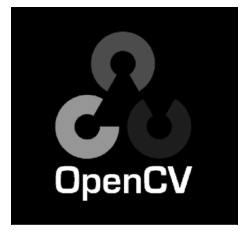

In [121]:
pltImage(img2gray)

In [122]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

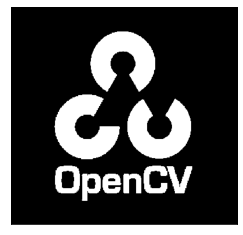

In [123]:
pltImage(mask)

In [124]:
mask_inv = cv2.bitwise_not(mask)

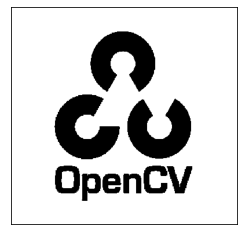

In [125]:
pltImage(mask_inv)

In [126]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

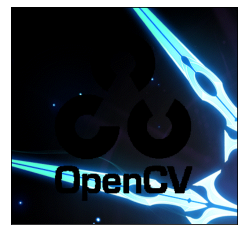

In [127]:
pltImage(img1_bg)

In [128]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

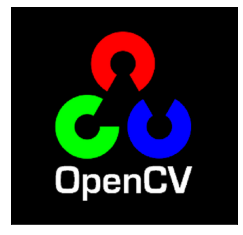

In [129]:
pltImage(img2_fg)

In [130]:
dst = cv2.add(img1_bg,img2_fg)

In [131]:
img1[0:rows, 0:cols ] = dst

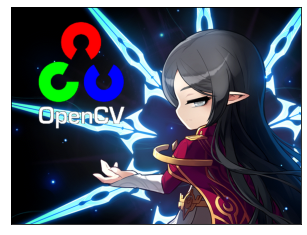

In [132]:
pltImage(img1)

In [37]:
# Load two images
img1 = cv2.imread('2.png')
img2 = cv2.imread('cv2.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()